In [1]:
from visualstoryteller.getonepic import getonepic

[nltk_data] Downloading package brown to /Users/ger/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
text = "To be or not to be, that is the question, whether it's noble to beat the i have forgotten what else is the text"

73728/66469 [=================================] - 0s 0us/step


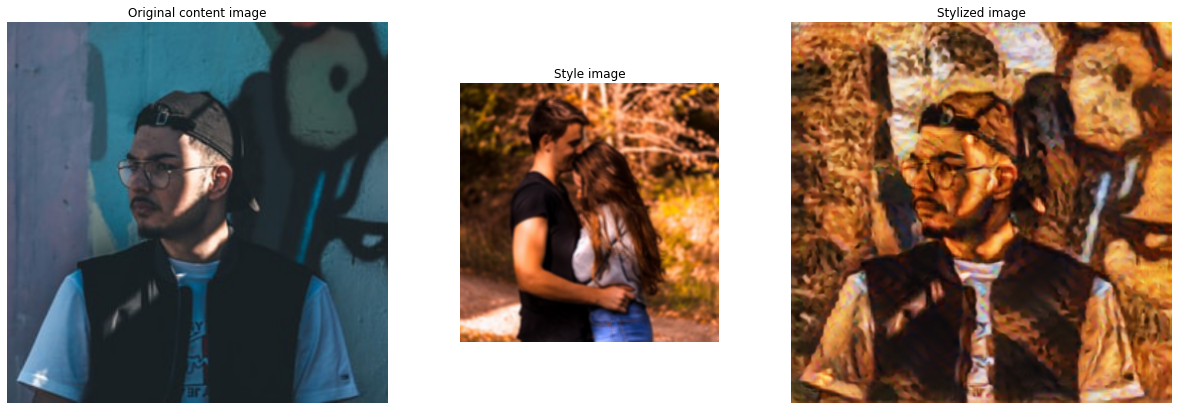

In [3]:
result = getonepic(text, show_all=True, saveimage=True, savename='tobeornot.jpg')

In [4]:
result

{'image': <tf.Tensor: shape=(1, 384, 384, 3), dtype=float32, numpy=
 array([[[[0.67896366, 0.5543506 , 0.4339385 ],
          [0.6796246 , 0.544804  , 0.43155542],
          [0.72307605, 0.587974  , 0.48193547],
          ...,
          [0.91083115, 0.75549436, 0.22684097],
          [0.933455  , 0.75987595, 0.20409259],
          [0.93976843, 0.7592174 , 0.20950544]],
 
         [[0.64814985, 0.5392471 , 0.41934687],
          [0.65505683, 0.53249127, 0.41804716],
          [0.70448995, 0.57634664, 0.47014305],
          ...,
          [0.92357033, 0.7617111 , 0.24660096],
          [0.9377083 , 0.7701856 , 0.21131575],
          [0.9469335 , 0.777598  , 0.2203168 ]],
 
         [[0.5895237 , 0.51106435, 0.38137498],
          [0.5993606 , 0.50458765, 0.37484127],
          [0.6484305 , 0.5470899 , 0.41856974],
          ...,
          [0.94205785, 0.8057479 , 0.32585672],
          [0.94660544, 0.8027707 , 0.26140076],
          [0.95641685, 0.808491  , 0.27175033]],
 
         ...,


In [5]:
result['saved'][2]

'b'

In [6]:
import matplotlib.pyplot as plt

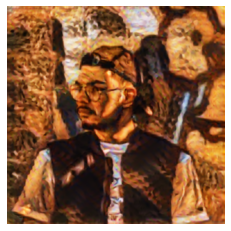

In [7]:
plt.imshow(result['image'][0])
plt.axis('off');